### Classification modeling of breast cancer data 

In the previous blog, collinearity issues were addressed by removing some of the variables from the data  and PCA was applied to reduce the dimensionality. The reduced data is used here in this blog for modeling breast cancer. Since, we do not know the best model for this problem, first selected classification models will be compared and later the best will be fitted to the data for prediction purposes. 

The classification models compared are K-nearest Neighbors, Support Vector Classifier, and Logistic Regression.  

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from imblearn.over_sampling import SMOTE
import random
random.seed( 67 )


Using TensorFlow backend.


In [2]:
# loading the raw data
bc=pd.read_csv("../input/data.csv")
bc.head()  
P=bc.iloc[:,2:32]

In [3]:
# summary stat of the raw data
bc.iloc[:,2:32].describe() 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
yd=pd.get_dummies(bc.diagnosis)
y=yd.M
y.head() # response variable

    
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(P, y.ravel())
X_train_res = pd.DataFrame(X_train_res)
y_train_res = pd.DataFrame(y_train_res)
X_train_res.columns = P.columns 
y_train_res.columns = pd.DataFrame(y).columns 
    #print(y_train_res)
#print("After SMOTE",y_train_res.Income.value_counts())

new_df = pd.concat([X_train_res, y_train_res], axis=1, sort=False)
new_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900,1
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020,1
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580,1
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000,1
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780,1
5,12.450000,15.700000,82.570000,477.100000,0.127800,0.170000,0.157800,0.080890,0.208700,0.076130,0.334500,0.890200,2.217000,27.190000,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470000,23.750000,103.400000,741.600000,0.179100,0.524900,0.535500,0.174100,0.398500,0.124400,1
6,18.250000,19.980000,119.600000,1040.000000,0.094630,0.109000,0.112700,0.074000,0.179400,0.057420,0.446700,0.773200,3.180000,53.910000,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880000,27.660000,153.200000,1606.000000,0.144200,0.257600,0.378400,0.193200,0.306300,0.083680,1
7,13.710000,20.830000,90.200000,577.900000,0.118900,0.164500,0.093660,0.059850,0.219600,0.074510,0.583500,1.377000,3.856000,50.960000,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060000,28.140000,110.600000,897.000000,0.165400,0.368200,0.267800,0.155600,0.319600,0.115100,1
8,13.000000,21.820000,87.500000,519.800000,0.127300,0.193200,0.185900,0.093530,0.235000,0.073890,0.306300,1.002000,2.406000,24.320000,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490000,30.730000,106.200000,739.300000,0.170300,0.540100,0.539000,0.206000,0.437800,0.107200,1
9,12.460000,24.040000,83.970000,475.900000,0.118600,0.239600,0.227300,0.085430,0.203000,0.082430,0.297600,1.599000,2.039000,23.940000,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090000,40.680000,97.650000,711.400000,0.185300,1.058000,1.105000,0.221000,0.436600,0.207500,1


In [5]:
# standardizing and PCA
scaler = StandardScaler()
P_scaled=scaler.fit_transform(P)
P_scaled=pd.DataFrame(P_scaled)
PP=P_scaled.drop(P_scaled.columns[[2, 3, 22, 23, 12, 13]], axis=1) 
pca=PCA(n_components=0.95)
P_pca=pca.fit_transform(PP)
print (P_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())

(569, 11)
[0.42661046 0.15932139 0.10294428 0.07788731 0.06489774 0.05015242
 0.02145044 0.0187846  0.01505759 0.01197751 0.01117206]
0.9602558201892891


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


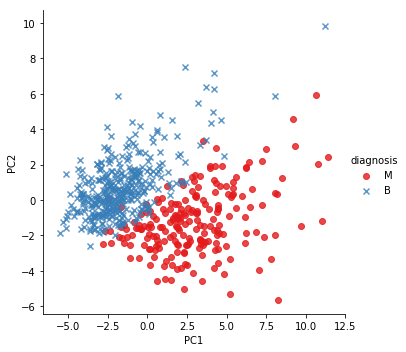

In [6]:
n=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','diagnosis']
d=bc.iloc[:,1:2]  # diagnosis column
#merging the reduced data with diagnosis column
Xy=pd.DataFrame(np.hstack([P_pca,d.as_matrix()]),columns=n)
# plotting the the first 2 pca components against diagnosis
sns.lmplot("PC1", "PC2", hue="diagnosis", data=Xy, fit_reg=False,markers=["o", "x"],palette="Set1")
plt.show()

## Modeling 
From the above plot, we can see that the positive and negative cases (i.e. B and M) have fairly distinctive regions, this makes it easier to fit linear or non-linear classifiers to model the problem. Below, **k-neighbors,Support Vector MAchine(SVM), and Linear Discriminant Analysis (LDA)** classifiers are fit to the data and later results are compared.

#### Splitting the data: training and test 

In [7]:

new_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900,1
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020,1
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580,1
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000,1
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780,1
5,12.450000,15.700000,82.570000,477.100000,0.127800,0.170000,0.157800,0.080890,0.208700,0.076130,0.334500,0.890200,2.217000,27.190000,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470000,23.750000,103.400000,741.600000,0.179100,0.524900,0.535500,0.174100,0.398500,0.124400,1
6,18.250000,19.980000,119.600000,1040.000000,0.094630,0.109000,0.112700,0.074000,0.179400,0.057420,0.446700,0.773200,3.180000,53.910000,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880000,27.660000,153.200000,1606.000000,0.144200,0.257600,0.378400,0.193200,0.306300,0.083680,1
7,13.710000,20.830000,90.200000,577.900000,0.118900,0.164500,0.093660,0.059850,0.219600,0.074510,0.583500,1.377000,3.856000,50.960000,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060000,28.140000,110.600000,897.000000,0.165400,0.368200,0.267800,0.155600,0.319600,0.115100,1
8,13.000000,21.820000,87.500000,519.800000,0.127300,0.193200,0.185900,0.093530,0.235000,0.073890,0.306300,1.002000,2.406000,24.320000,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490000,30.730000,106.200000,739.300000,0.170300,0.540100,0.539000,0.206000,0.437800,0.107200,1
9,12.460000,24.040000,83.970000,475.900000,0.118600,0.239600,0.227300,0.085430,0.203000,0.082430,0.297600,1.599000,2.039000,23.940000,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090000,40.680000,97.650000,711.400000,0.185300,1.058000,1.105000,0.221000,0.436600,0.207500,1


In [8]:
from sklearn.model_selection import train_test_split
#predictor X

X=(Xy.iloc[:,0:11]).as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.25, random_state=0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


### 1. K-nearest Neighbors classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier()

**Parameter tuning: optimizing the number of neighbors (k)**
* For optimization purposes it is suggested using the training data; and
* for performance estimation or to figure out the best model, the test data will be used.

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when

[0.942 0.92  0.946 0.917 0.935 0.913 0.935 0.902 0.913 0.899 0.902 0.888
 0.892 0.888 0.891 0.888 0.891 0.881 0.892 0.877 0.881 0.873 0.881 0.873
 0.877 0.87  0.873 0.87  0.87  0.866 0.866 0.862 0.866 0.862 0.866 0.859
 0.859 0.859 0.859 0.848 0.862 0.848 0.855 0.848 0.851 0.848 0.855 0.848
 0.851]


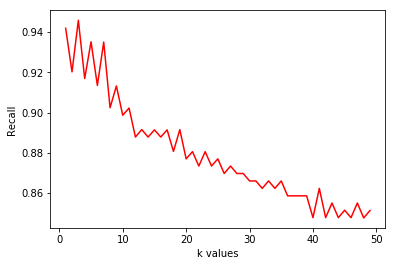

In [10]:
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train,y_train,cv=10,scoring='recall')
    k_scores.append(scores.mean())
print(np.round(k_scores,3)) # to display scores to 3 decimal places
from matplotlib import pyplot as plt
plt.plot(k_range,k_scores,color="red")
plt.xlabel('k values')
plt.ylabel('Recall')
plt.show()

* From the above plot the optimal k value is somewhere between 1 and 10. Looking at the scores, at k=5 we have the highest recall/sensitivity.
* We can use a more efficient parameter tuning approach called **GridSearchCV** as shown below which basically automates the search process and it also fits the optimal parameter to the training data.

In [11]:
from sklearn.model_selection import GridSearchCV
k_range=list(range(1,50))
param_grid=dict(n_neighbors=k_range)
scores = ['accuracy', 'recall'] # evaluation scores for selecting best parameter
for sc in scores:
    grid_knn=GridSearchCV(knn,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid_knn.fit(X_train,y_train)
    print(grid_knn.best_params_)
    print(np.round(grid_knn.best_score_,3))

# Tuning hyper-parameters for accuracy


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_neighbors': 1}
0.944
# Tuning hyper-parameters for recall
{'n_neighbors': 3}
0.946


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


* Here, the optimal n_neighbors according to recall score (sensitivity) is **selected i.e.k=5** instead of k=6. As we are more concerned in predicting cancer cases (M) accurately rather than no-cancer cases (B), we go with results found using recall or sensitivity score.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


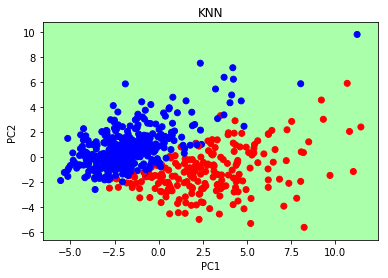

In [12]:
# fitting the optimal model (i.e. knn with k=5 based upon recall score) onto the training data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# for display purposes, we fit the model on the first two components i.e. PC1, and PC2
knn.fit(X_train.iloc[:,0:2], y_train)
# Plotting the decision boundary for all data (both train and test)
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAFFAA','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])
# creating a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(xy_mesh)
%matplotlib inline
Z = Z.reshape(xx.shape)
#print(Z)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax=plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max());plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('KNN')
plt.show()

#### 2. Support Vector Machine (SVM)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svc=SVC()
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5],'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
scores = ['accuracy', 'recall']
for sc in scores:
    grid=GridSearchCV(svc,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid.fit(X_train,y_train)
    print(grid.best_params_)
    print(np.round(grid.best_score_,3))

# Tuning hyper-parameters for accuracy


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 100, 'kernel': 'linear'}
0.963
# Tuning hyper-parameters for recall


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 100, 'kernel': 'linear'}
0.964


* Using accuracy and recall as scoring metrics, both give the same model as optimal i.e. {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}. Here below, we fit this model to the data and do visualization of the results.

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


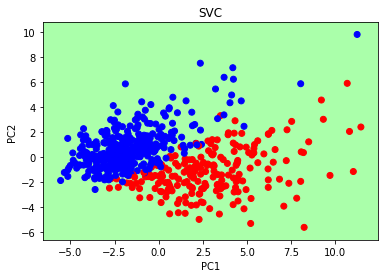

In [14]:
from sklearn import metrics
from sklearn import model_selection as cv

# fitting the optimal model onto the training data
svc=SVC(C=100,gamma=0.001,kernel='rbf')
svc.fit(X_train, y_train)

# for display purposes, we fit the model on the first two components i.e. PC1, and PC2
svc.fit(X_train.iloc[:,0:2], y_train)

# Plotting the decision boundary for all data (both train and test)
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAFFAA','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])

# creating a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = svc.predict(xy_mesh)
Z = Z.reshape(xx.shape)

#plotting data on decision boundary
%matplotlib inline
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('SVC')
plt.show()

#### 3. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

lgr = LogisticRegression()

#parameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
scores = ['accuracy', 'recall']
for sc in scores:
    grid_lgr=GridSearchCV(lgr,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid_lgr.fit(X_train,y_train)
    print(grid_lgr.best_params_)
    print(np.round(grid_lgr.best_score_,3))

# Tuning hyper-parameters for accuracy


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1000}
0.955
# Tuning hyper-parameters for recall
{'C': 100}
0.953


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


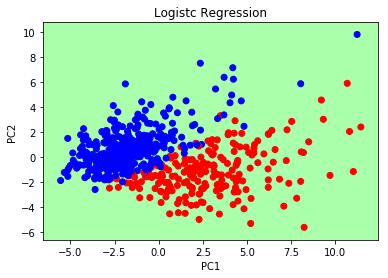

In [16]:
# fitting the optimal model onto the training data
from sklearn import metrics
from sklearn import model_selection as cv

# fitting the optimal model onto the training data
lgr=LogisticRegression(C=1)
lgr.fit(X_train, y_train)

# for display purposes, we fit the model on the first two components i.e. PC1, and PC2
lgr.fit(X_train.iloc[:,0:2], y_train)

# Plotting the decision boundary for all data (both train and test)
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAFFAA','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])

# creating a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = lgr.predict(xy_mesh)
Z = Z.reshape(xx.shape)

%matplotlib inline
#print(Z)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('Logistc Regression')
plt.show()

SVC and Logistic regression scored similar performance, but we should be careful since the model has not yet tested on test data or on data independent of the one used for training the models. Below, we fit the three models onto the test data (X_test) and compare the predictions (y_predict) with observations (y_test). For this purpose, various evaluation metrics are implemented. 

#### Model Selection

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


KNN:
 confusion matrix
 [[90  8]
 [ 4 77]] 


Confusion matrix plot of KNN classifier


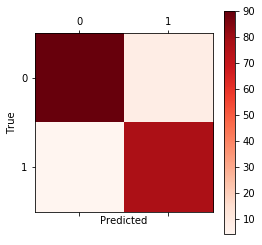


 Classification report 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        98
           1       0.91      0.95      0.93        81

   micro avg       0.93      0.93      0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179

#############################################################################
SVC:
 confusion matrix
 [[90  8]
 [ 5 76]] 


Confusion matrix plot of SVC


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


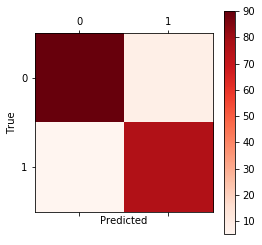


 Classification report 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93        98
           1       0.90      0.94      0.92        81

   micro avg       0.93      0.93      0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179

#############################################################################
Logistic Regression:
confusion matrix
 [[94  4]
 [ 3 78]] 


Confusion matrix plot of Logistic regression


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


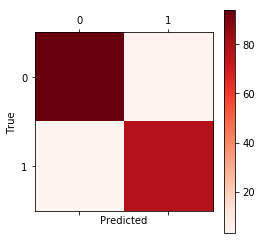


 Classification report 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        98
           1       0.95      0.96      0.96        81

   micro avg       0.96      0.96      0.96       179
   macro avg       0.96      0.96      0.96       179
weighted avg       0.96      0.96      0.96       179



In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# KNN
# fitting the knn model on the training data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn =knn.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_knn)
print('KNN:\n confusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of KNN classifier')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, y_pred_knn))
print ('#############################################################################')

# SVC
# fitting the SVC model on the training data and predicting for test data
svc=SVC(C=100,gamma=0.001,kernel='rbf',probability=True)
svc.fit(X_train, y_train)
y_pred_svc =svc.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_svc)
print('SVC:\n confusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of SVC')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, y_pred_svc))
print ('#############################################################################')

# Logistic Regression
# fitting the lgr model on the training data
lgr=LogisticRegression(C=1)
lgr.fit(X_train, y_train)
y_pred_lgr =lgr.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_lgr)
print('Logistic Regression:\nconfusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of Logistic regression')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, y_pred_lgr))

* Scores on Malignant cases from each model are summarized as below:



| Model         | Precision  | Recall | f1-score |
| ------------- |:----------:| -----: | --------:|
| KNN           | 0.98       |   0.91 | 0.94     |
| SVC           | 0.98       |   0.94 | 0.96     |
| Logistic      | 0.98       |   0.94 | 0.96     |



** Conclusion:**

* As results show, both SVC and logistic regression are performing equally good. One may choose either of the models on the basis of other factors such as simplicity in parameter tuning and ease of interpritation and so on.
* Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
* Threshold can be adjusted to increase sensitivity or specificity. Specificity explains how often is the prediction correct when the actual value is negative (0). Sensitivity and specificity have an inverse relationship.
* For this sepcific case, sensitivity is more important so we focus finding the threshold level which can give us the highest sensitivity. 
* We can manually change the threshold level and evaluate results. But instead we can plot ROC curve and see the effect of threshold on sensitivity and specificity. 

#### Effect of classification threshold on model performance
* Threshold of 0.5 is used by default to convert predicted probabilities to class predictions. Threshold can be adjusted to increase sensitivity/recall 

model: KNN
thresholds: [2.  1.  0.8 0.6 0.4 0.2 0. ]
tpr:        [0.    0.84  0.926 0.951 0.951 0.988 1.   ]
fpr:        [0.    0.031 0.041 0.082 0.112 0.173 1.   ]
model: SVC
thresholds: [1.997e+00 9.970e-01 9.380e-01 9.370e-01 9.290e-01 9.220e-01 9.200e-01
 9.190e-01 8.670e-01 8.670e-01 6.910e-01 3.060e-01 1.380e-01 1.800e-02
 1.800e-02 1.000e-03]
tpr:        [0.    0.012 0.568 0.568 0.593 0.593 0.605 0.605 0.84  0.84  0.938 0.938
 0.988 0.988 1.    1.   ]
fpr:        [0.    0.    0.    0.01  0.01  0.031 0.031 0.041 0.041 0.051 0.051 0.163
 0.163 0.541 0.541 1.   ]
model: Logistic
thresholds: [2.    1.    0.976 0.966 0.947 0.945 0.602 0.593 0.491 0.432 0.33  0.287
 0.271 0.   ]
tpr:        [0.    0.062 0.778 0.778 0.815 0.815 0.963 0.963 0.975 0.975 0.988 0.988
 1.    1.   ]
fpr:        [0.    0.    0.    0.01  0.01  0.02  0.02  0.041 0.041 0.051 0.051 0.061
 0.061 1.   ]


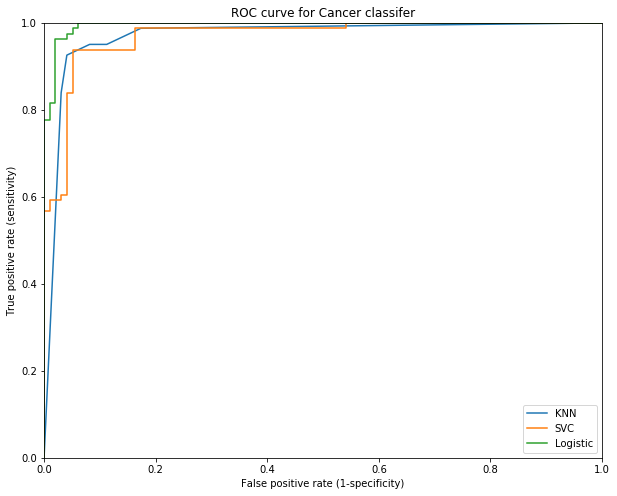

In [18]:
# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
y_pred_knn_p =knn.predict_proba(X_test)[:,1]
y_pred_svc_p =svc.predict_proba(X_test)[:,1]
y_pred_lgr_p =lgr.predict_proba(X_test)[:,1]

models=[y_pred_knn_p,y_pred_svc_p,y_pred_lgr_p]
label=['KNN','SVC','Logistic']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(3)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    print('model:',label[m])
    print('thresholds:',np.round(thresholds,3))
    print('tpr:       ',np.round(tpr,3))
    print('fpr:       ',np.round(fpr,3))
    plt.plot(fpr,tpr,label=label[m])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for Cancer classifer')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.legend(loc=4,)

* From the ROC curve, KNN has resulted the least peformance among the three models. SVC and Logistic seem to have the same performance for thresholds ~0.25 and above but for threshold below 0.25 svc performs better than logistic. 
* From these, we can lean to scv as its overall performace is better under various threshold levels. Therefore, 
  * **Optimal model: svc with C=100, gamma=0.001, kernel=rbf, and threshold value of 0.44**
      * by changing the treshold from its default value of 0.5 to 0.44, the sensitivity increases from 0.94 to 0.962. 
  

## Training the model with Autoencoder and Neural network

In [19]:

from keras.callbacks import CSVLogger

csv_logger = CSVLogger('log_adult.csv', append=True, separator=';')

from keras.models import Model, load_model,Sequential
from keras.layers import Input, Dense,Dropout,Activation
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

import os
#print(os.listdir(""))
from scipy import stats
import tensorflow as tf
import itertools
import seaborn as sns
from pylab import rcParams
from pandas.compat import StringIO
from sklearn import metrics#new_df = pd.concat([X_train_res, y_train_res], axis=1, sort=False)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_mm = scaler.fit_transform(new_df)

df1_scaled = pd.DataFrame(df_mm, columns=new_df.columns)

df1_scaled

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1.0
5,0.258839,0.202570,0.267984,0.141506,0.678613,0.461996,0.369728,0.402038,0.518687,0.551179,0.080753,0.117132,0.068793,0.038080,0.197063,0.234311,0.092727,0.215382,0.193730,0.144660,0.268232,0.312633,0.263908,0.136748,0.712739,0.482784,0.427716,0.598282,0.477035,0.454939,1.0
6,0.533343,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058,0.367793,0.370707,0.157119,0.121383,0.091275,0.114169,0.087987,0.088418,0.086881,0.056919,0.196818,0.081725,0.044367,0.531839,0.416844,0.511928,0.349194,0.482269,0.223448,0.302236,0.663918,0.295289,0.187853,1.0
7,0.318472,0.376057,0.320710,0.184263,0.598267,0.445126,0.219447,0.297465,0.573737,0.517060,0.170922,0.224717,0.146021,0.082477,0.241085,0.210578,0.062828,0.274294,0.098188,0.156060,0.324795,0.429638,0.299766,0.174941,0.622268,0.330753,0.213898,0.534708,0.321506,0.393939,1.0
8,0.284869,0.409537,0.302052,0.159618,0.674099,0.533157,0.435567,0.464861,0.651515,0.504002,0.070541,0.141841,0.077699,0.032720,0.136588,0.246102,0.089722,0.232241,0.190634,0.098607,0.268943,0.498667,0.277852,0.136183,0.654626,0.497531,0.430511,0.707904,0.554504,0.342123,1.0
9,0.259312,0.484613,0.277659,0.140997,0.595558,0.675480,0.532568,0.424602,0.489899,0.683867,0.067391,0.273780,0.060406,0.032010,0.184791,0.525115,0.195530,0.271263,0.140823,0.317331,0.254714,0.763859,0.235271,0.129326,0.753682,1.000000,0.882588,0.759450,0.552139,1.000000,1.0


In [20]:
df1_scaled.M.value_counts()

0.0    357
1.0    357
Name: M, dtype: int64

In [21]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

dict_characters = {0: 'Malignant', 1: 'Benign'}

def ROC_plot(pred_prob, pred,y_test):
    temp3 = pd.DataFrame()
    print("\n")
   # ax1 = plt.subplot(221)
    fpr,tpr,the= metrics.roc_curve(y_test,pred)
    auc = metrics.roc_auc_score(y_test, pred_prob)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend(loc=4)
    plt.show()
    print("\n")
   # ax2 = plt.subplot(222)
    cnf_matrix = confusion_matrix(y_test, pred)
    dict_characters = {0: 'Malignant', 1: 'Benign'}
    plot_confusion_matrix(cnf_matrix, classes=dict_characters,title='Confusion matrix')
    plt.show()
    print("\n")
    print('\x1b[1;32m'+ "Accuracy: %s%%" % round(100*metrics.accuracy_score(y_test, pred),2)+'\x1b[0m')
    print("\n")
    print(metrics.classification_report(y_test, pred))
    
    #print(metrics.accuracy_score(y_test, pred))
    temp3['Accuracy'] = pd.Series(metrics.accuracy_score(y_test, pred))
    temp3['AUC'] = pd.Series(round(metrics.roc_auc_score(y_test, pred),2))
    temp3['F1 Score'] = pd.Series(round(metrics.f1_score(y_test, pred, average='weighted')  ,2))
    temp3['Recall'] = pd.Series(round(metrics.recall_score(y_test, pred, average='weighted') ,2))
    temp3['Precision'] = pd.Series(round(metrics.precision_score(y_test, pred, average='weighted') ,2))
    #print(temp3)fpr,tpr
    roc_model = pd.concat([pd.DataFrame(fpr), pd.DataFrame(tpr)], axis =1)
    return temp3, roc_model

In [22]:
def seperate_data(df1):
    
    return X,y

def traintest_split(df1):
    X=df1.iloc[:,0:-1]
    y=df1.iloc[:,-1]
#    print(X.head())
#    print(y.head())
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,shuffle=False)
    print(x_train.shape)
    print(x_test.shape)
 #   print(y_train.shape)
  #  sm = SMOTE(random_state=2)
  #  X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())
  #  X_train_res = pd.DataFrame(X_train_res)
  #  y_train_res = pd.DataFrame(y_train_res)
   # y_train_res.columns = ['Income']
    #print(y_train_res)
  #  print("After SMOTE",y_train_res.Income.value_counts())
    return x_train,x_test,y_train,y_test


In [23]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

def autoencoder(x_train, x_test, epoch = 10):
    
    encoder_acc_df = pd.DataFrame()
    input_dim = x_train.shape[1]
    encoding_dim = 8

    input_layer = Input(shape=(input_dim, ))
    encoder = Dense(encoding_dim, activation="relu", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
#encoder2 = Dense(int(encoding_dim / 2), activation="relu")(encoder1)
    encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
#decoder = Dense(int(encoding_dim / 2), activation="relu")(encoder3)
#decoder = Dense(int(encoding_dim / 2), activation='relu')(encoder2)
    decoder = Dense(encoding_dim, activation='relu')(encoder)
    decoder = Dense(input_dim, activation='sigmoid')(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)


    nb_epoch = epoch
    batch_size = 4
    print('\x1b[1;32m'+"\nAuto encoder Training\n" +'\x1b[0m')
    autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error')
   # checkpointer = ModelCheckpoint(filepath="model.h5",
   #                            verbose=0,
  #                             save_best_only=True)
  #  tensorboard = TensorBoard(log_dir='./logs',
  #                        histogram_freq=0,
   #                       write_graph=True,
   #                       write_images=True)
    history = autoencoder.fit(x_train, x_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    verbose =2,
                    validation_data=(x_test, x_test),
                    
                    callbacks=[csv_logger]).history
    encoder = Model(input_layer, encoder)
    encoded_input = Input(shape = (encoding_dim, ))


#Encode data set from above using the encoder
    encoded_train_x = encoder.predict(x_train)
    encoded_test_x = encoder.predict(x_test)
    
    temp = pd.DataFrame()

    L  = []
    for x in range(nb_epoch):
       L.append((str(input_dim) + ',' + str(encoding_dim) +  ',' + str(int(encoding_dim / 2)) + ',' + str(encoding_dim) + ',' + str(input_dim)))

    epoch_list  = []
    for x in range(1,nb_epoch+1):
        epoch_list.append(x)

#history['Layer'].append(L)    
#encoder_acc_df.assign(Layer=L)
#encoder_acc_df.append(pd.DataFrame(history[['acc','val_acc','loss','val_loss']])    )

    temp['Layer'] = pd.Series(L)
    temp['epoch'] = pd.Series(epoch_list).astype('str')
 #   temp['Acc'] = history['acc']
   # temp['Val_Acc'] = history['val_acc']
    temp['Loss']= history['loss']  
    temp['Val_Loss'] = history['val_loss']
    
    return encoded_train_x,encoded_test_x,temp
   

In [24]:

def stacked_model(encoded_train_x  , y_train, epochs =10):
    temp2 = pd.DataFrame()
    nb_epoch = epochs
    model = Sequential()
    model.add(Dense(30, input_dim=encoded_train_x.shape[1],
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(0.02),
                activation="relu"
                )
          )
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.add(Activation("sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer='adam', 
                    metrics=['accuracy'])
    print('\x1b[1;32m'+"\nModel Summary\n" +'\x1b[0m')
    print(model.summary())
    print('\x1b[1;32m'+"\nStacked Autoencoder Training\n" +'\x1b[0m')
    stacked_history = model.fit(encoded_train_x  , y_train, validation_split =0.2 , epochs = epochs , batch_size =16,verbose =2,callbacks=[CSVLogger('fit.log')])
    
    L  = []
    for x in range(nb_epoch):
       L.append((str(encoded_train_x.shape[1]) + ',' + '16' +  ',' + '1'))

    epoch_list  = []
    for x in range(1,nb_epoch+1):
        epoch_list.append(x)
 
    temp2['Layer'] = pd.Series(L)
    temp2['epoch'] = pd.Series(epoch_list).astype('str')
    temp2['Acc'] = stacked_history.history['acc']
    temp2['Val_Acc'] = stacked_history.history['val_acc']
    temp2['Loss'] = stacked_history.history['loss']  
    temp2['Val_Loss'] = stacked_history.history['val_loss']
    return stacked_history, model,temp2

In [25]:
def predict(encoded_test_x, stacked_model):
    pred = stacked_model.predict(encoded_test_x)
    pred_prob = pred
    pred[pred > 0.5 ] = 1
    pred[pred <= 0.5] = 0
    return pred_prob, pred

SAMPLE SIZE- 20.0 %

(95, 30)
(48, 30)
train.shape (95, 30)
Instructions for updating:
Colocations handled automatically by placer.

Auto encoder Training

Instructions for updating:
Use tf.cast instead.
Train on 95 samples, validate on 48 samples
Epoch 1/40
 - 1s - loss: 0.0919 - val_loss: 0.0868
Epoch 2/40
 - 0s - loss: 0.0858 - val_loss: 0.0799
Epoch 3/40
 - 0s - loss: 0.0779 - val_loss: 0.0710
Epoch 4/40
 - 0s - loss: 0.0678 - val_loss: 0.0612
Epoch 5/40
 - 0s - loss: 0.0571 - val_loss: 0.0520
Epoch 6/40
 - 0s - loss: 0.0474 - val_loss: 0.0446
Epoch 7/40
 - 0s - loss: 0.0398 - val_loss: 0.0386
Epoch 8/40
 - 0s - loss: 0.0338 - val_loss: 0.0342
Epoch 9/40
 - 0s - loss: 0.0297 - val_loss: 0.0315
Epoch 10/40
 - 0s - loss: 0.0266 - val_loss: 0.0290
Epoch 11/40
 - 0s - loss: 0.0244 - val_loss: 0.0267
Epoch 12/40
 - 0s - loss: 0.0225 - val_loss: 0.0256
Epoch 13/40
 - 0s - loss: 0.0210 - val_loss: 0.0242
Epoch 14/40
 - 0s - loss: 0.0199 - val_loss: 0.0233
Epoch 15/40
 - 0s - loss: 0.0190 

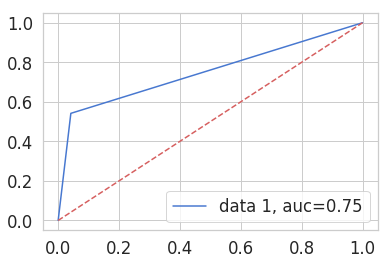

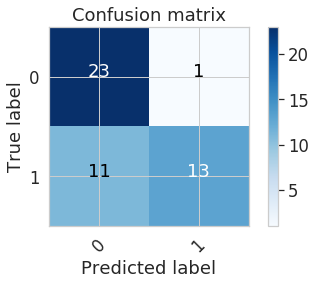



Accuracy: 75.0%


              precision    recall  f1-score   support

         0.0       0.68      0.96      0.79        24
         1.0       0.93      0.54      0.68        24

   micro avg       0.75      0.75      0.75        48
   macro avg       0.80      0.75      0.74        48
weighted avg       0.80      0.75      0.74        48


*************************************************************************************************************************

*************************************************************************************************************************

SAMPLE SIZE- 40.0 %

(191, 30)
(95, 30)
train.shape (191, 30)

Auto encoder Training

Train on 191 samples, validate on 95 samples
Epoch 1/40
 - 1s - loss: 0.0872 - val_loss: 0.0861
Epoch 2/40
 - 0s - loss: 0.0733 - val_loss: 0.0659
Epoch 3/40
 - 0s - loss: 0.0515 - val_loss: 0.0456
Epoch 4/40
 - 0s - loss: 0.0372 - val_loss: 0.0373
Epoch 5/40
 - 0s - loss: 0.0323 - val_loss: 0.0345
Epoch 6/40
 - 0s - l

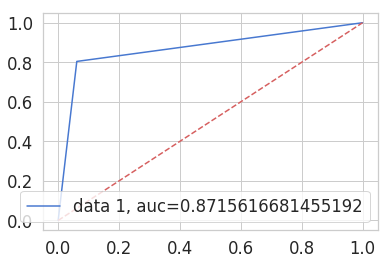

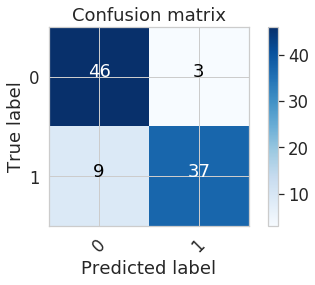



Accuracy: 87.37%


              precision    recall  f1-score   support

         0.0       0.84      0.94      0.88        49
         1.0       0.93      0.80      0.86        46

   micro avg       0.87      0.87      0.87        95
   macro avg       0.88      0.87      0.87        95
weighted avg       0.88      0.87      0.87        95


*************************************************************************************************************************

*************************************************************************************************************************

SAMPLE SIZE- 60.0 %

(286, 30)
(142, 30)
train.shape (286, 30)

Auto encoder Training

Train on 286 samples, validate on 142 samples
Epoch 1/40
 - 1s - loss: 0.0861 - val_loss: 0.0806
Epoch 2/40
 - 0s - loss: 0.0677 - val_loss: 0.0534
Epoch 3/40
 - 0s - loss: 0.0443 - val_loss: 0.0364
Epoch 4/40
 - 0s - loss: 0.0354 - val_loss: 0.0315
Epoch 5/40
 - 0s - loss: 0.0323 - val_loss: 0.0295
Epoch 6/40
 - 0s 

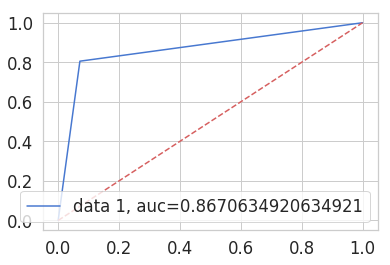

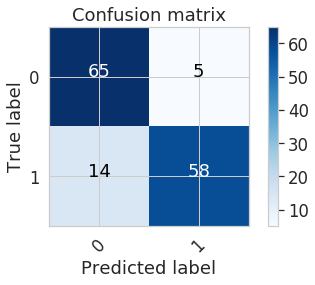



Accuracy: 86.62%


              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87        70
         1.0       0.92      0.81      0.86        72

   micro avg       0.87      0.87      0.87       142
   macro avg       0.87      0.87      0.87       142
weighted avg       0.87      0.87      0.87       142


*************************************************************************************************************************

*************************************************************************************************************************

SAMPLE SIZE- 80.0 %

(382, 30)
(189, 30)
train.shape (382, 30)

Auto encoder Training

Train on 382 samples, validate on 189 samples
Epoch 1/40
 - 1s - loss: 0.0801 - val_loss: 0.0598
Epoch 2/40
 - 0s - loss: 0.0409 - val_loss: 0.0326
Epoch 3/40
 - 0s - loss: 0.0300 - val_loss: 0.0282
Epoch 4/40
 - 0s - loss: 0.0270 - val_loss: 0.0256
Epoch 5/40
 - 0s - loss: 0.0246 - val_loss: 0.0231
Epoch 6/40
 - 0s 

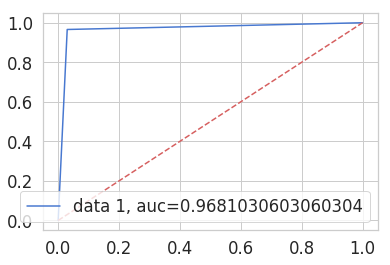

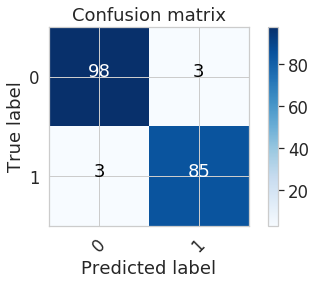



Accuracy: 96.83%


              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       101
         1.0       0.97      0.97      0.97        88

   micro avg       0.97      0.97      0.97       189
   macro avg       0.97      0.97      0.97       189
weighted avg       0.97      0.97      0.97       189


*************************************************************************************************************************

*************************************************************************************************************************

SAMPLE SIZE- 100.0 %

(478, 30)
(236, 30)
train.shape (478, 30)

Auto encoder Training

Train on 478 samples, validate on 236 samples
Epoch 1/40
 - 1s - loss: 0.0743 - val_loss: 0.0510
Epoch 2/40
 - 0s - loss: 0.0373 - val_loss: 0.0310
Epoch 3/40
 - 0s - loss: 0.0272 - val_loss: 0.0253
Epoch 4/40
 - 0s - loss: 0.0225 - val_loss: 0.0211
Epoch 5/40
 - 0s - loss: 0.0190 - val_loss: 0.0180
Epoch 6/40
 - 0s

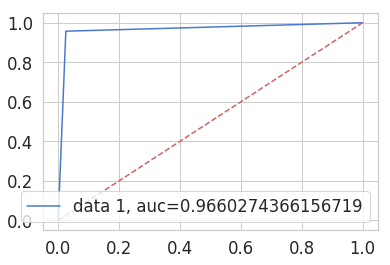

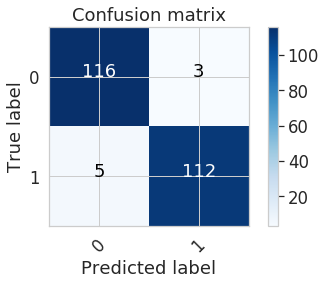



Accuracy: 96.61%


              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       119
         1.0       0.97      0.96      0.97       117

   micro avg       0.97      0.97      0.97       236
   macro avg       0.97      0.97      0.97       236
weighted avg       0.97      0.97      0.97       236


*************************************************************************************************************************

*************************************************************************************************************************



In [26]:
encoder_acc_df = pd.DataFrame()
stacked_log_df = pd.DataFrame()
Accuracy_df = pd.DataFrame()
samples = [0.2,0.4,0.6,0.8,1.0]
#samples = [0.2,0.4]
ROC_values = pd.DataFrame()
for i in samples:
      print('\x1b[1;36m'+"SAMPLE SIZE-", i*100, "%\n" +'\x1b[0m')
      df2 = df1_scaled.sample(frac= i)
 #     X,y = seperate_data(df2)
 #     encoded_X = autoencoder(X, epoch = 2)
    #  print( "df2 shape", df2.Income.value_counts(), df2.shape)
  #    print( "\n*********************************************")
      x_train,x_test,y_train,y_test = traintest_split(df2)
      print("train.shape", x_train.shape)
      encoded_train_x,encoded_test_x, temp = autoencoder(x_train,x_test, 40)
      temp['Sample Size'] = (str(i * 100) + "%")
      encoder_acc_df = encoder_acc_df.append(temp, ignore_index=False)
      
      history, stackedmodel, temp2 = stacked_model(encoded_train_x, y_train, 40)
      temp2['Sample Size'] = (str(i * 100) + "%")
      stacked_log_df = stacked_log_df.append(temp2, ignore_index=False)
      pred_prob, pred = predict(encoded_test_x, stackedmodel)
      
      
      
      temp3,roc_model = ROC_plot(pred_prob, pred,y_test)
      temp3['Sample Size'] = (str(i * 100) + "%")
      Accuracy_df = Accuracy_df.append(temp3, ignore_index=False)
      roc_model['Sample Size'] = (str(i * 100) + "%")
      ROC_values = ROC_values.append(roc_model)
      
      del history
      del stackedmodel
      del df2
      del x_train,x_test,y_train,y_test
      del pred_prob, pred
      del roc_model
      print( "\n*************************************************************************************************************************\n")
      print( "*************************************************************************************************************************\n")

In [27]:
Accuracy_df

,Accuracy,AUC,F1 Score,Recall,Precision,Sample Size
0,0.750,0.750,0.740,0.750,0.800,20.0%
0,0.874,0.870,0.870,0.870,0.880,40.0%
0,0.866,0.870,0.870,0.870,0.870,60.0%
0,0.968,0.970,0.970,0.970,0.970,80.0%
0,0.966,0.970,0.970,0.970,0.970,100.0%


,Accuracy,AUC,F1 Score,Recall,Precision,Sample Size
0,0.750,0.750,0.740,0.750,0.800,20.000
0,0.874,0.870,0.870,0.870,0.880,40.000
0,0.866,0.870,0.870,0.870,0.870,60.000
0,0.968,0.970,0.970,0.970,0.970,80.000
0,0.966,0.970,0.970,0.970,0.970,100.000


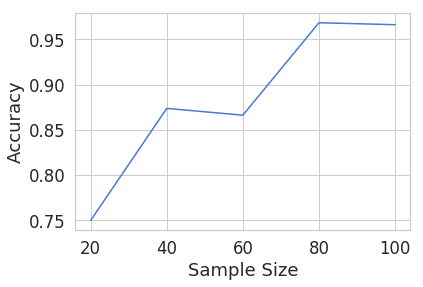

In [28]:
#encoder_acc_df
#stacked_log_df
import re
Accuracy_df['Sample Size'] = Accuracy_df['Sample Size'].map(lambda x: re.sub(r'\W+', '', x))
Accuracy_df['Sample Size']  = Accuracy_df['Sample Size'].astype(int)
Accuracy_df['Sample Size'] = Accuracy_df['Sample Size'] / 10 

#Accuracy_df.sort_values(by= ['Sample Size'], inplace = True)
#Accuracy_df = Accuracy_df.reset_index()

g =sns.lineplot(x=Accuracy_df["Sample Size"].sort_values(), y="Accuracy",
                 
                sizes=(.25, 2.5), data=Accuracy_df)
g
Accuracy_df
#temp3['Accuracy'] = pd.Series(round(metrics.accuracy_score(y_test, y_test),2)

In [29]:
ROC_values.columns = ['fpr','tpr','Sample']
ROC_values

,fpr,tpr,Sample
0,0.000,0.000,20.0%
1,0.042,0.542,20.0%
2,1.000,1.000,20.0%
0,0.000,0.000,40.0%
1,0.061,0.804,40.0%
2,1.000,1.000,40.0%
0,0.000,0.000,60.0%
1,0.071,0.806,60.0%
2,1.000,1.000,60.0%
0,0.000,0.000,80.0%


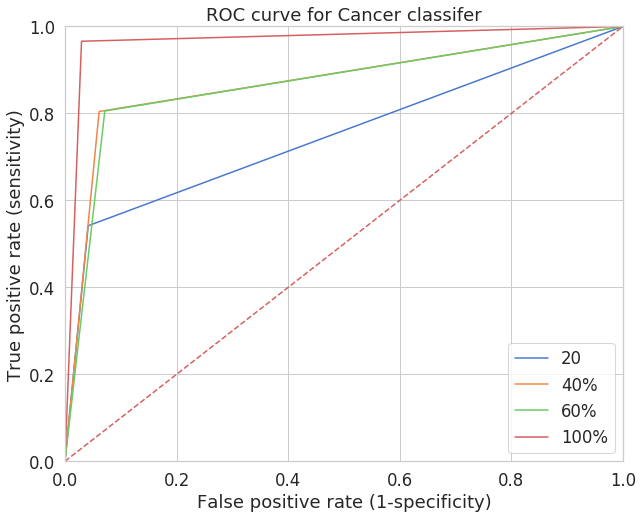

In [30]:
plt.figure(figsize=(10,8))
plt.plot(ROC_values['fpr'][0:3],ROC_values['tpr'][0:3],label='20')

plt.plot(ROC_values['fpr'][3:6],ROC_values['tpr'][3:6],label='40%')
plt.plot(ROC_values['fpr'][6:9],ROC_values['tpr'][6:9],label='60%')
plt.plot(ROC_values['fpr'][9:12],ROC_values['tpr'][9:12],label='100%')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Cancer classifer')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.legend(loc=4,)

In [31]:
encoder_acc_df.to_csv('../encoder_acc_cancer_df_1.csv')
stacked_log_df.to_csv('../stacked_log_cancer_df_1.csv')
Accuracy_df.to_csv('../accuracy_cancer1.csv')